In [52]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [53]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4659171297011173, 'attack_path_exposure': 0.9358105558657954, 'ROA': 0.8333602423320229, 'risk': 0.9295818359469153}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4450191486143427, 'attack_path_exposure': 0.9357752473230252, 'ROA': 0.8333602423320229, 'risk': 0.9486668488685682}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


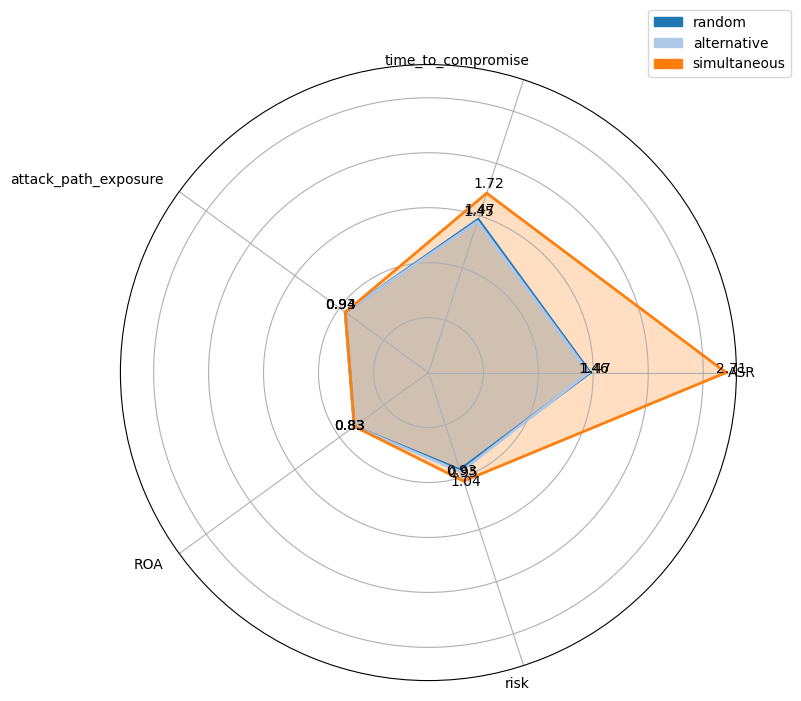

In [54]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [55]:
other_schemes =pd.DataFrame(schemes_data)

In [56]:
other_schemes

,random,alternative,simultaneous
ASR,1.472222,1.458333,2.708333
time_to_compromise,1.465917,1.445019,1.716376
attack_path_exposure,0.935811,0.935775,0.934393
ROA,0.833360,0.833360,0.833360
risk,0.929582,0.948667,1.038385


In [57]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [58]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
mtd_interval,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MEF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ASR,1.541667,1.500000,1.666667,1.500000,1.500000,1.541667,1.500000,1.666667,1.500000,1.500000,...,1.527778,1.500000,1.666667,1.500000,1.500000,1.533333,1.500000,1.666667,1.500000,1.479167
time_to_compromise,1.539001,1.472921,1.490427,1.705920,1.636373,1.531516,1.463085,1.509948,1.681476,1.622091,...,1.536620,1.452389,1.536698,1.716701,1.594399,1.521410,1.460346,1.524587,1.695276,1.604064
host_compromise_ratio,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,...,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652
network_size,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exposed_endpoints,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
attack_path_exposure,2.430100,2.259621,1.963146,2.659974,2.612895,2.460476,2.188711,1.946506,2.624508,2.583177,...,2.474469,2.211664,1.946506,2.659974,2.608279,2.454340,2.217121,1.917254,2.659974,2.579470
ROA,1.003314,1.103992,0.949342,1.048733,1.009120,1.023495,1.012679,1.046708,1.046538,1.034561,...,1.085373,0.976542,1.109508,0.925607,0.923494,0.965008,1.123553,1.002744,1.061525,0.998388
risk,1.035247,1.098857,1.001395,1.066848,1.043650,0.981797,1.034379,1.099603,1.070677,1.031752,...,1.046105,0.963792,1.182244,0.996320,0.928013,1.036367,1.131064,0.985090,1.081589,0.990844


In [59]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

Normalized Weighted Metrics for Each Scheme:
random          5.636892
alternative     5.621155
simultaneous    7.230848
Name: sum, dtype: float64


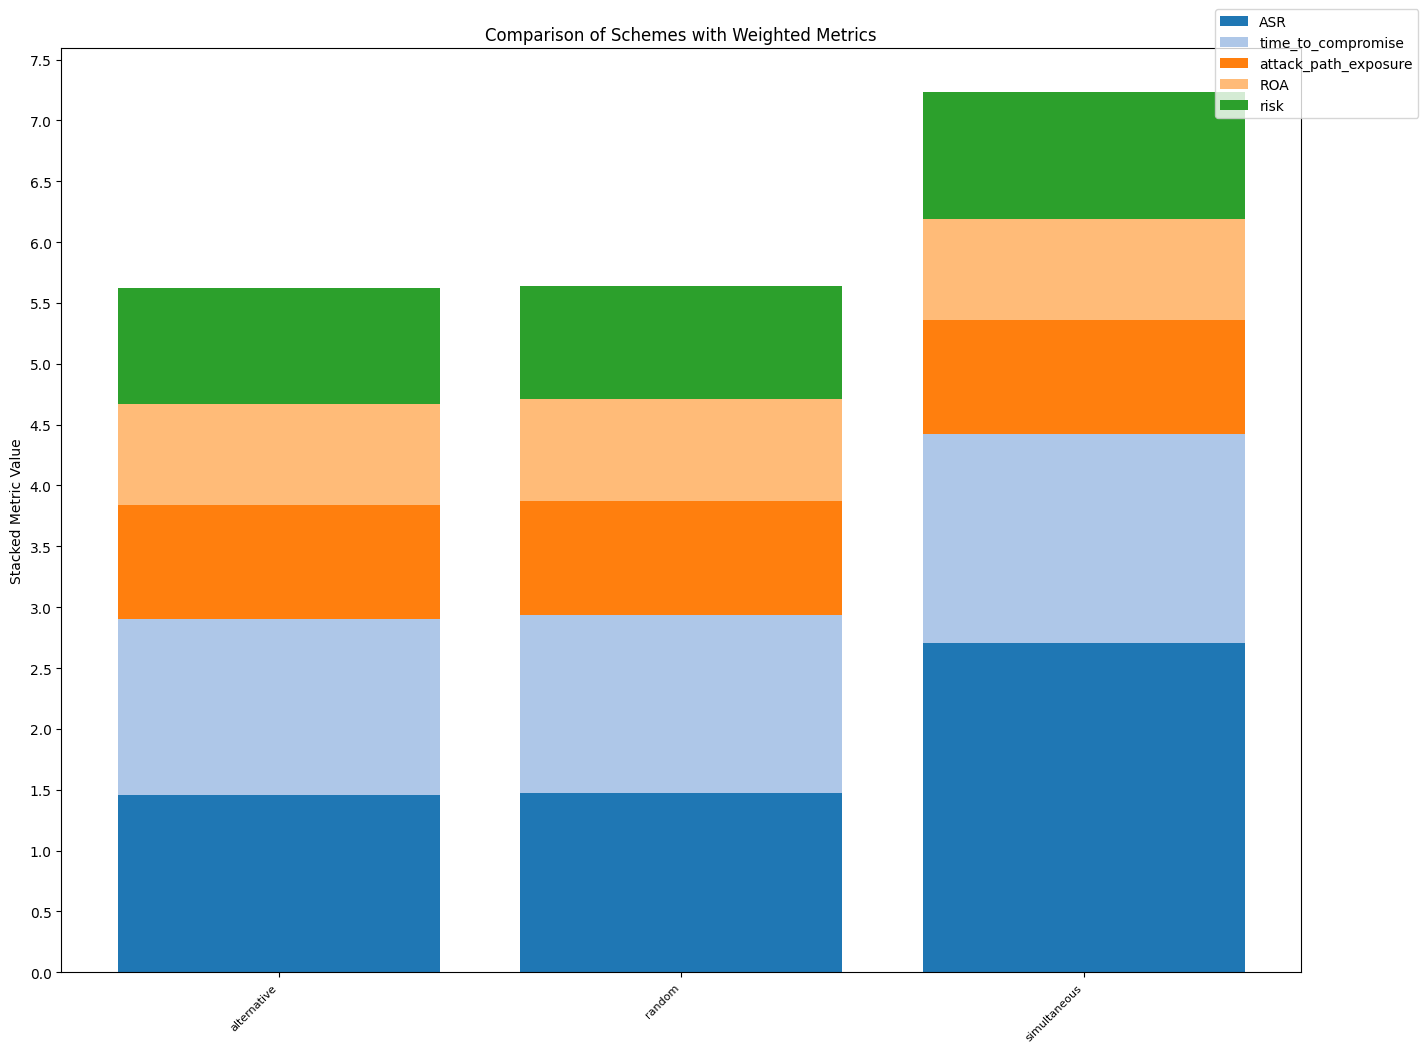

In [60]:
chart.plot_n_schemes(other_schemes, weights=weights)

In [61]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)

Normalized Weighted Metrics for Each Scheme:
all_features                                         7.549328
all_features_CompleteTopologyShuffle                 7.435391
all_features_IPShuffle                               7.070978
all_features_OSDiversity                             7.981475
all_features_ServiceDiversity                        7.802039
host_compromise_ratio                                7.538951
host_compromise_ratio_CompleteTopologyShuffle        7.198854
host_compromise_ratio_IPShuffle                      7.269432
host_compromise_ratio_OSDiversity                    7.923198
host_compromise_ratio_ServiceDiversity               7.771581
exposed_endpoints                                    7.528396
exposed_endpoints_CompleteTopologyShuffle            7.180073
exposed_endpoints_IPShuffle                          7.096564
exposed_endpoints_OSDiversity                        7.749800
exposed_endpoints_ServiceDiversity                   7.949072
attack_path_exposure     

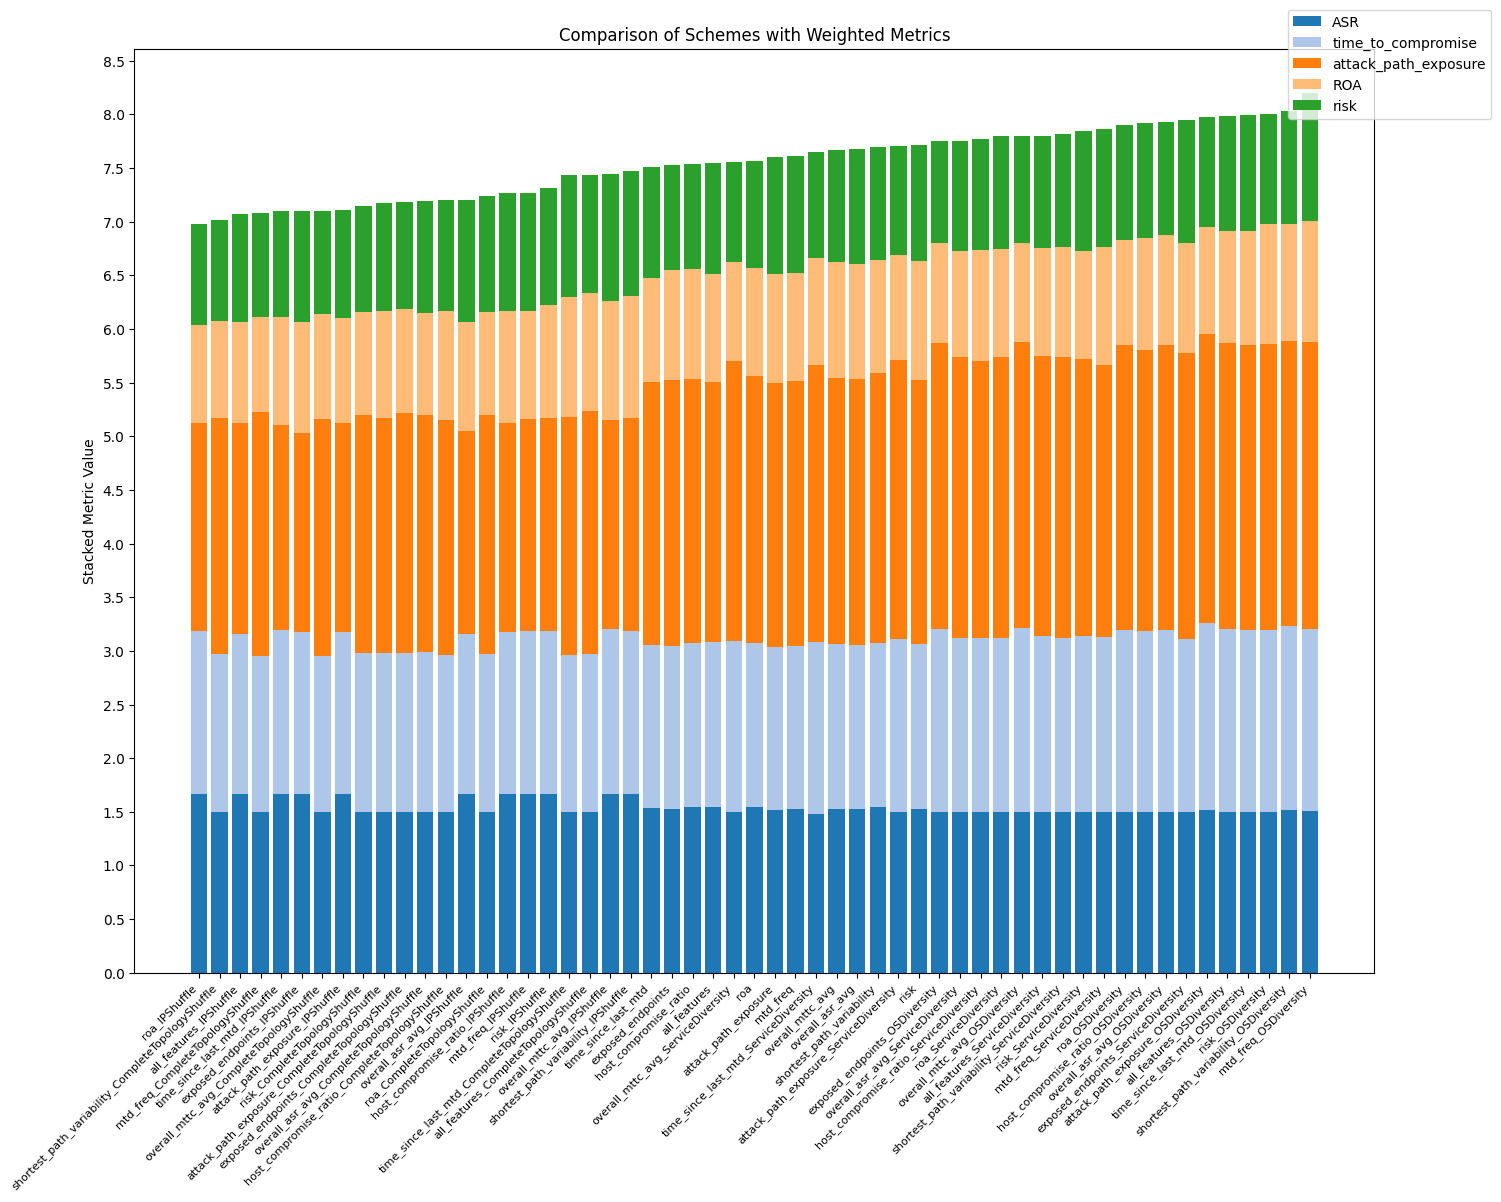

In [62]:
chart.plot_n_schemes(data, weights=weights)

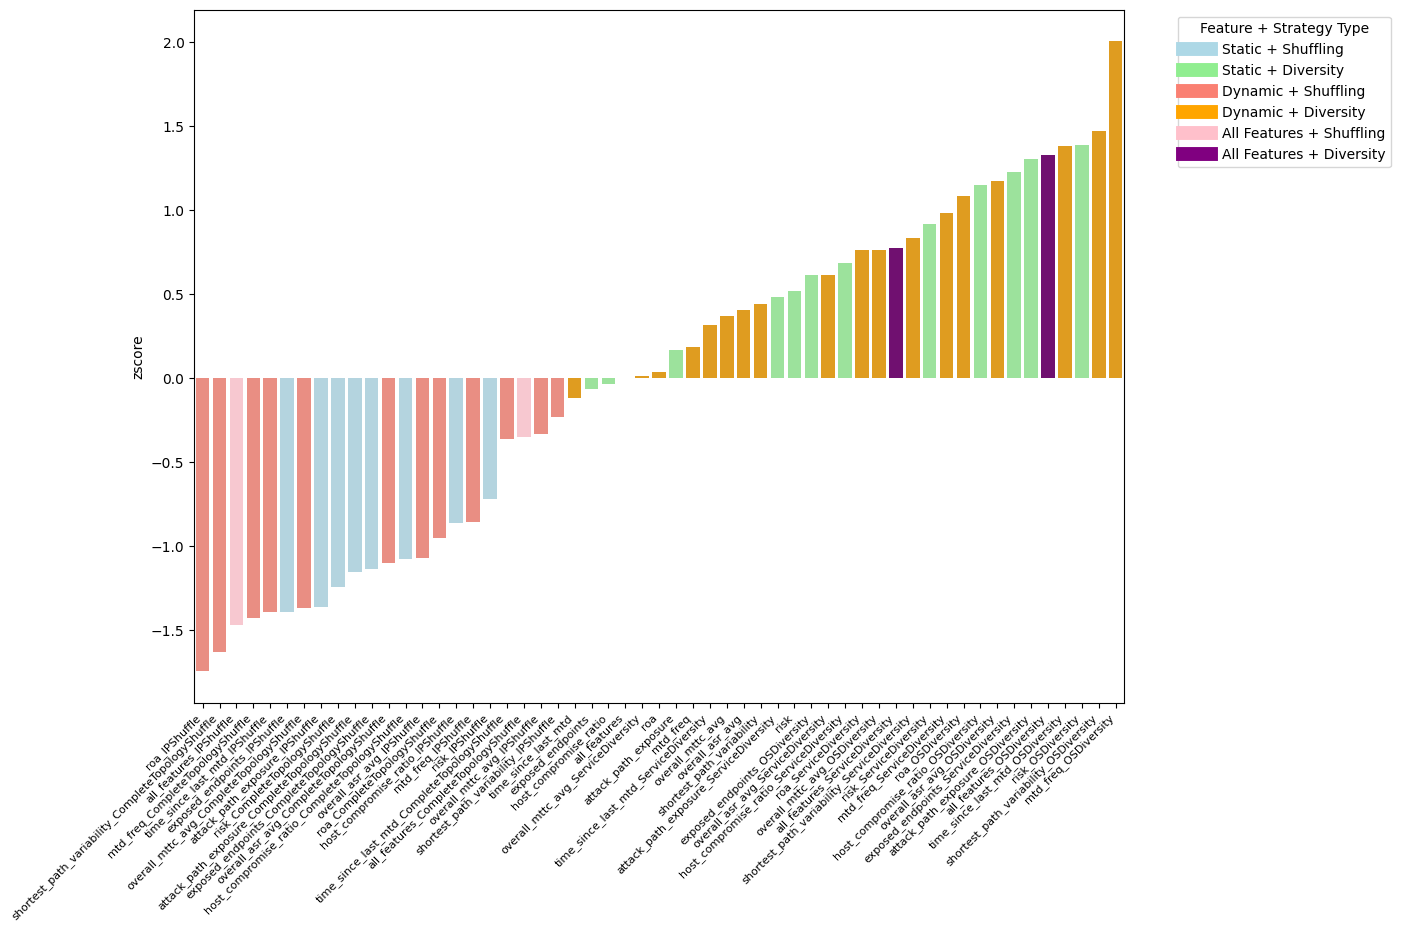

In [63]:
chart.normalized_chart("zscore")

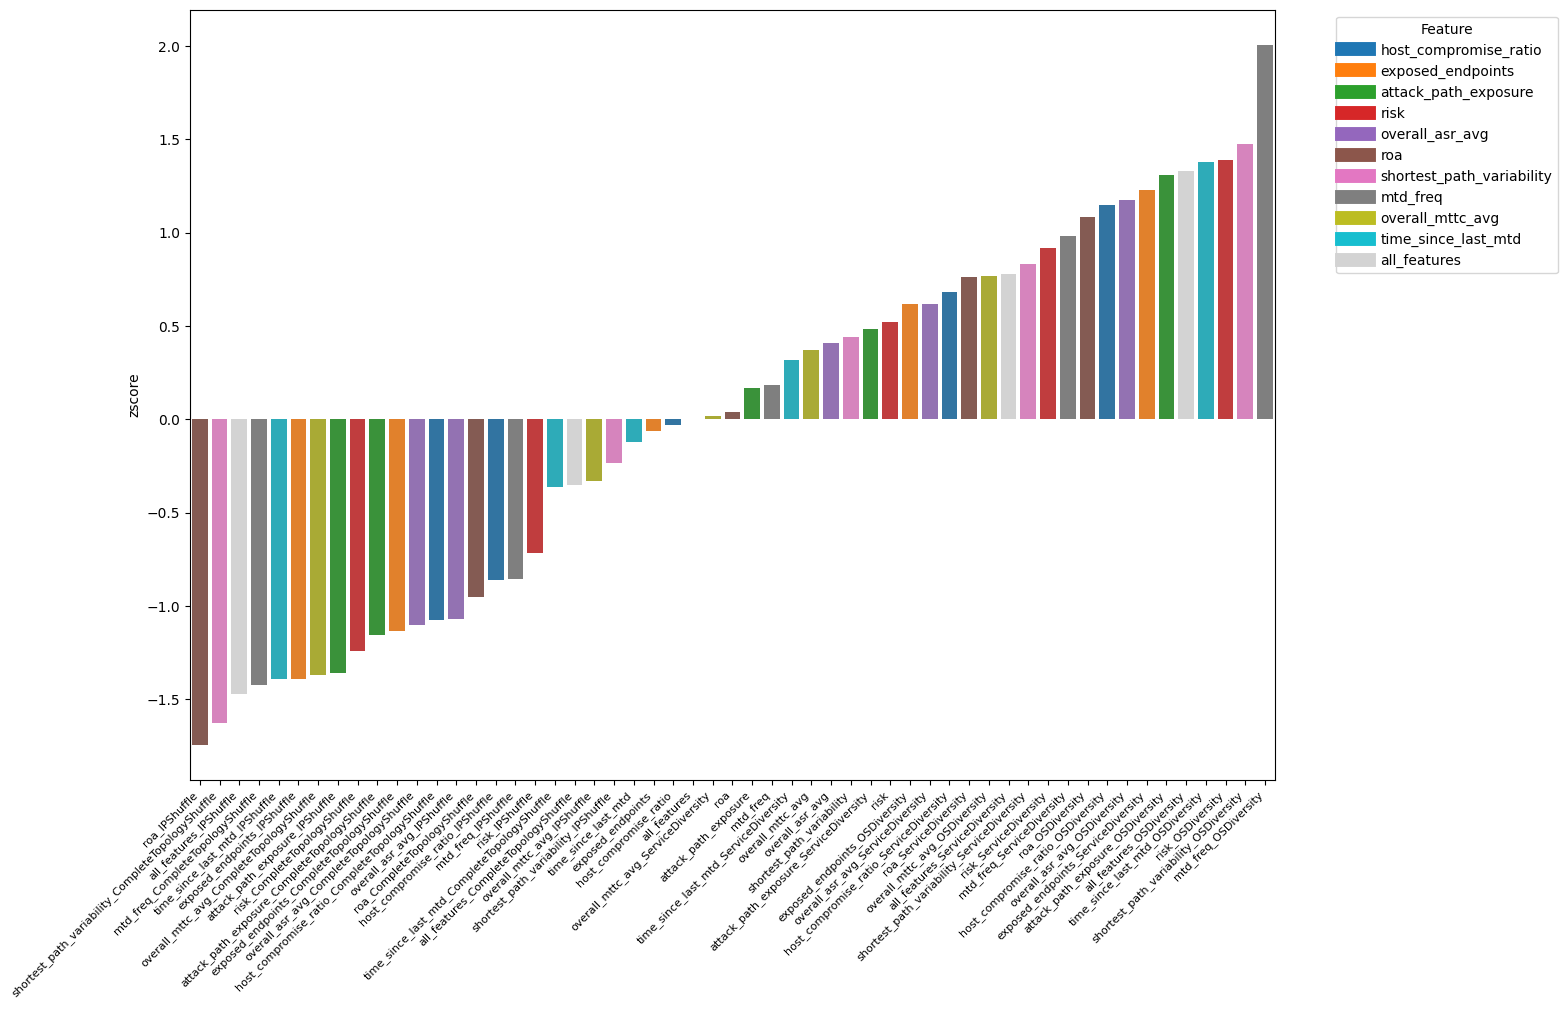

In [64]:
chart.features_only_chart('zscore')

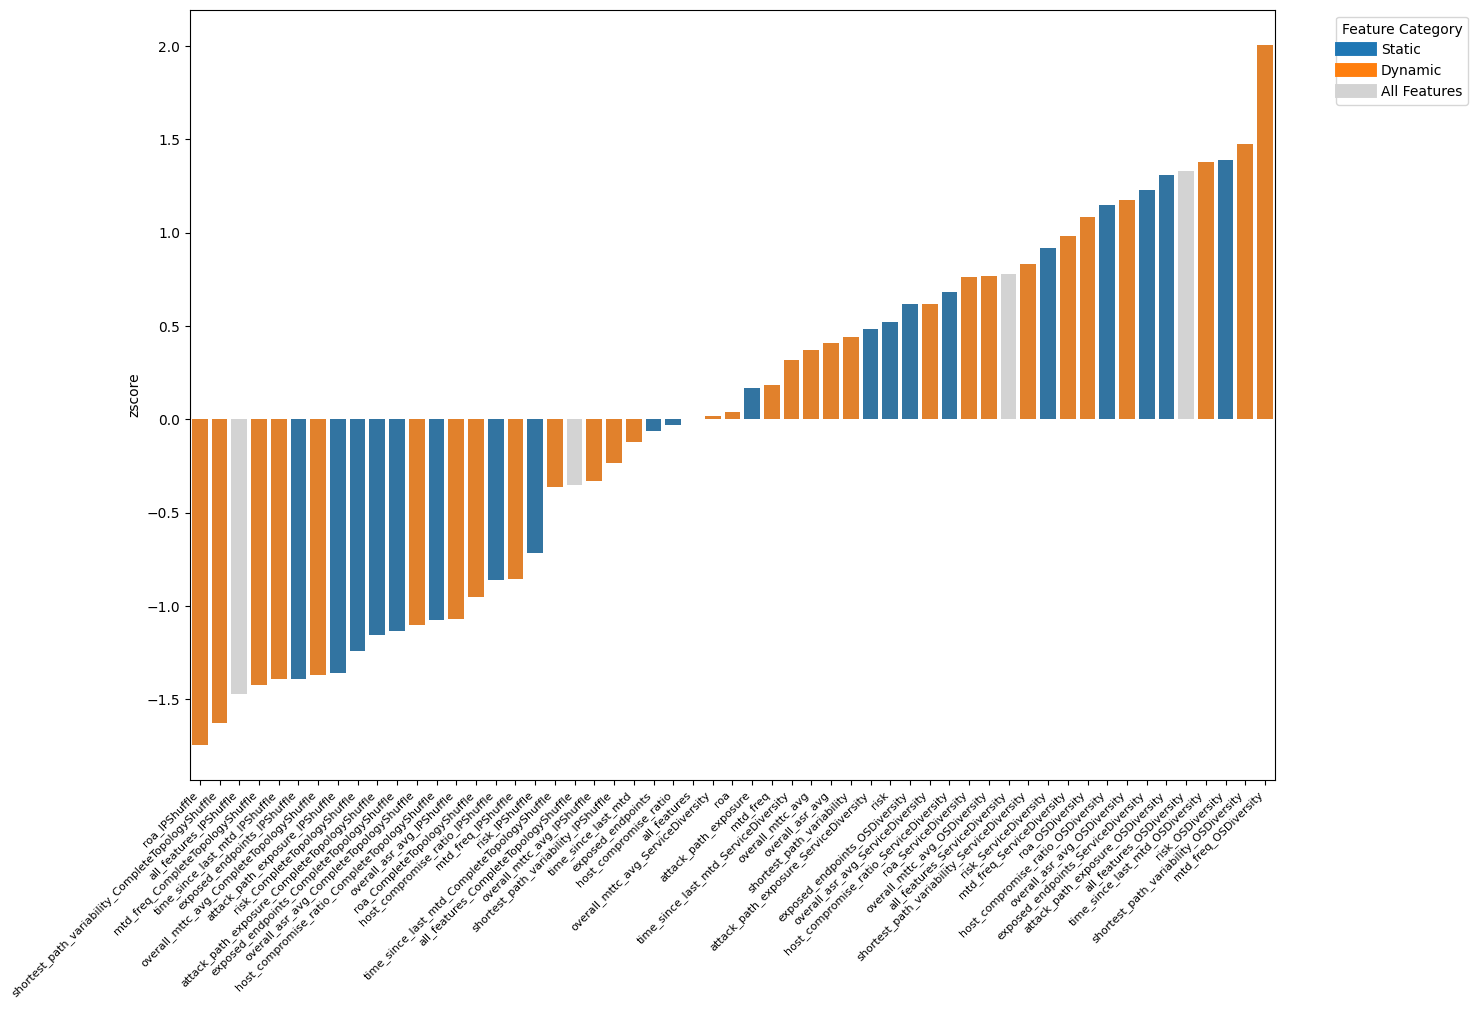

In [65]:
chart.feature_type_only_chart("zscore")

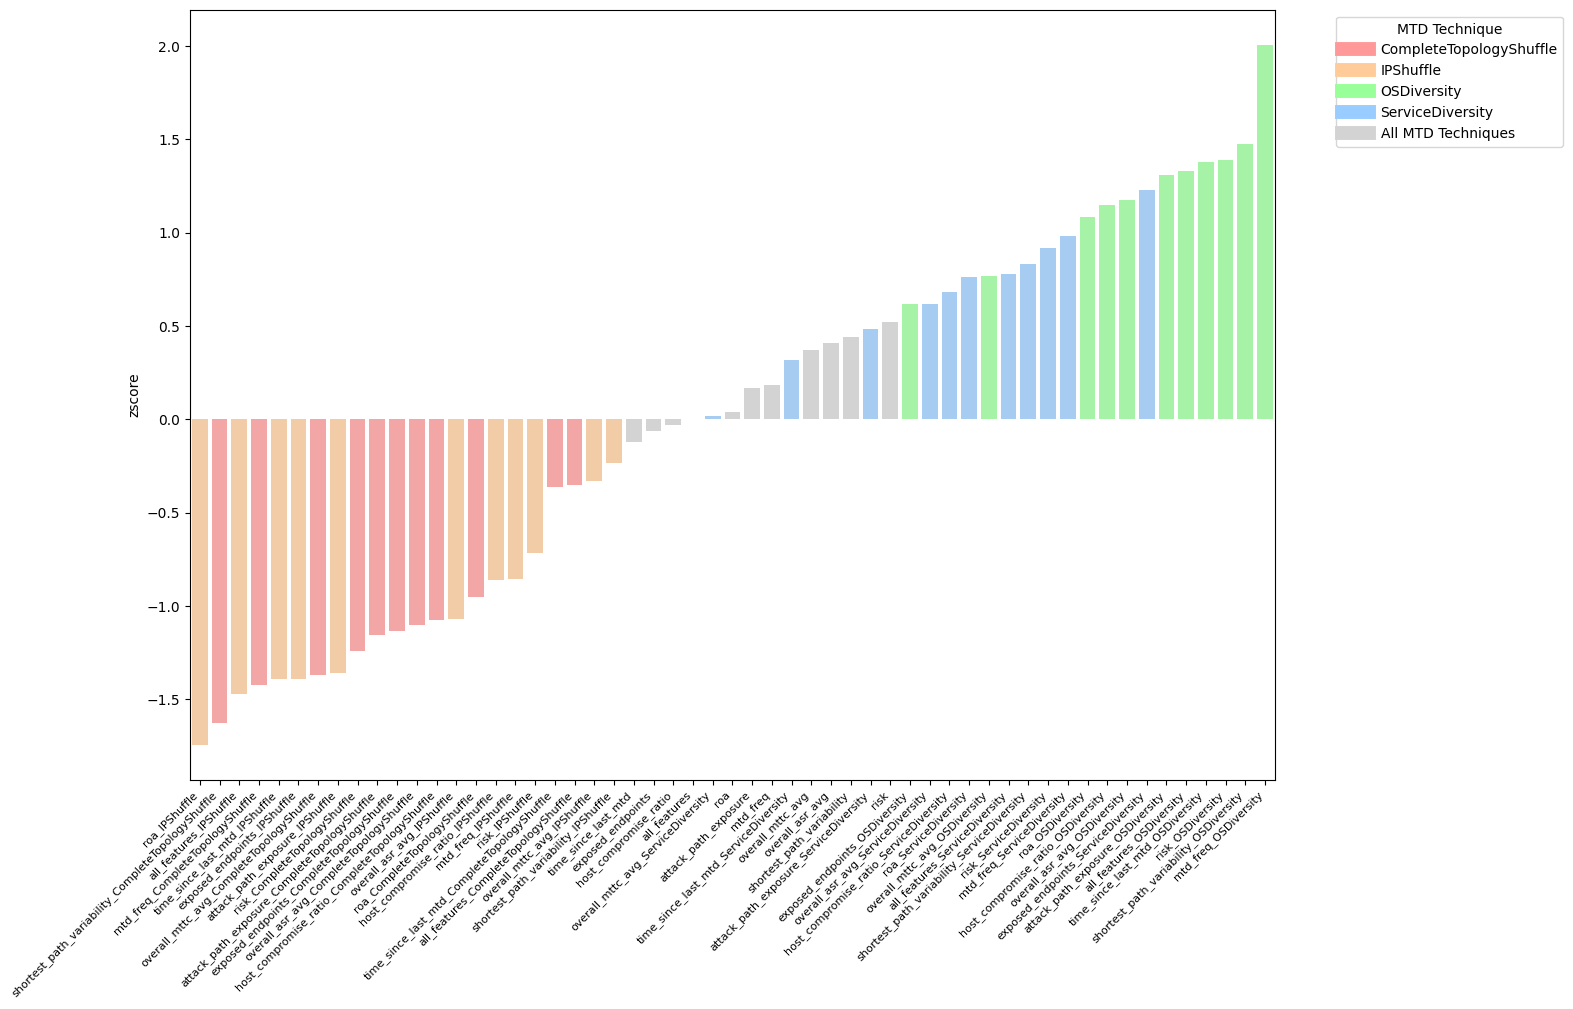

In [66]:
chart.mtd_techniques_chart('zscore')

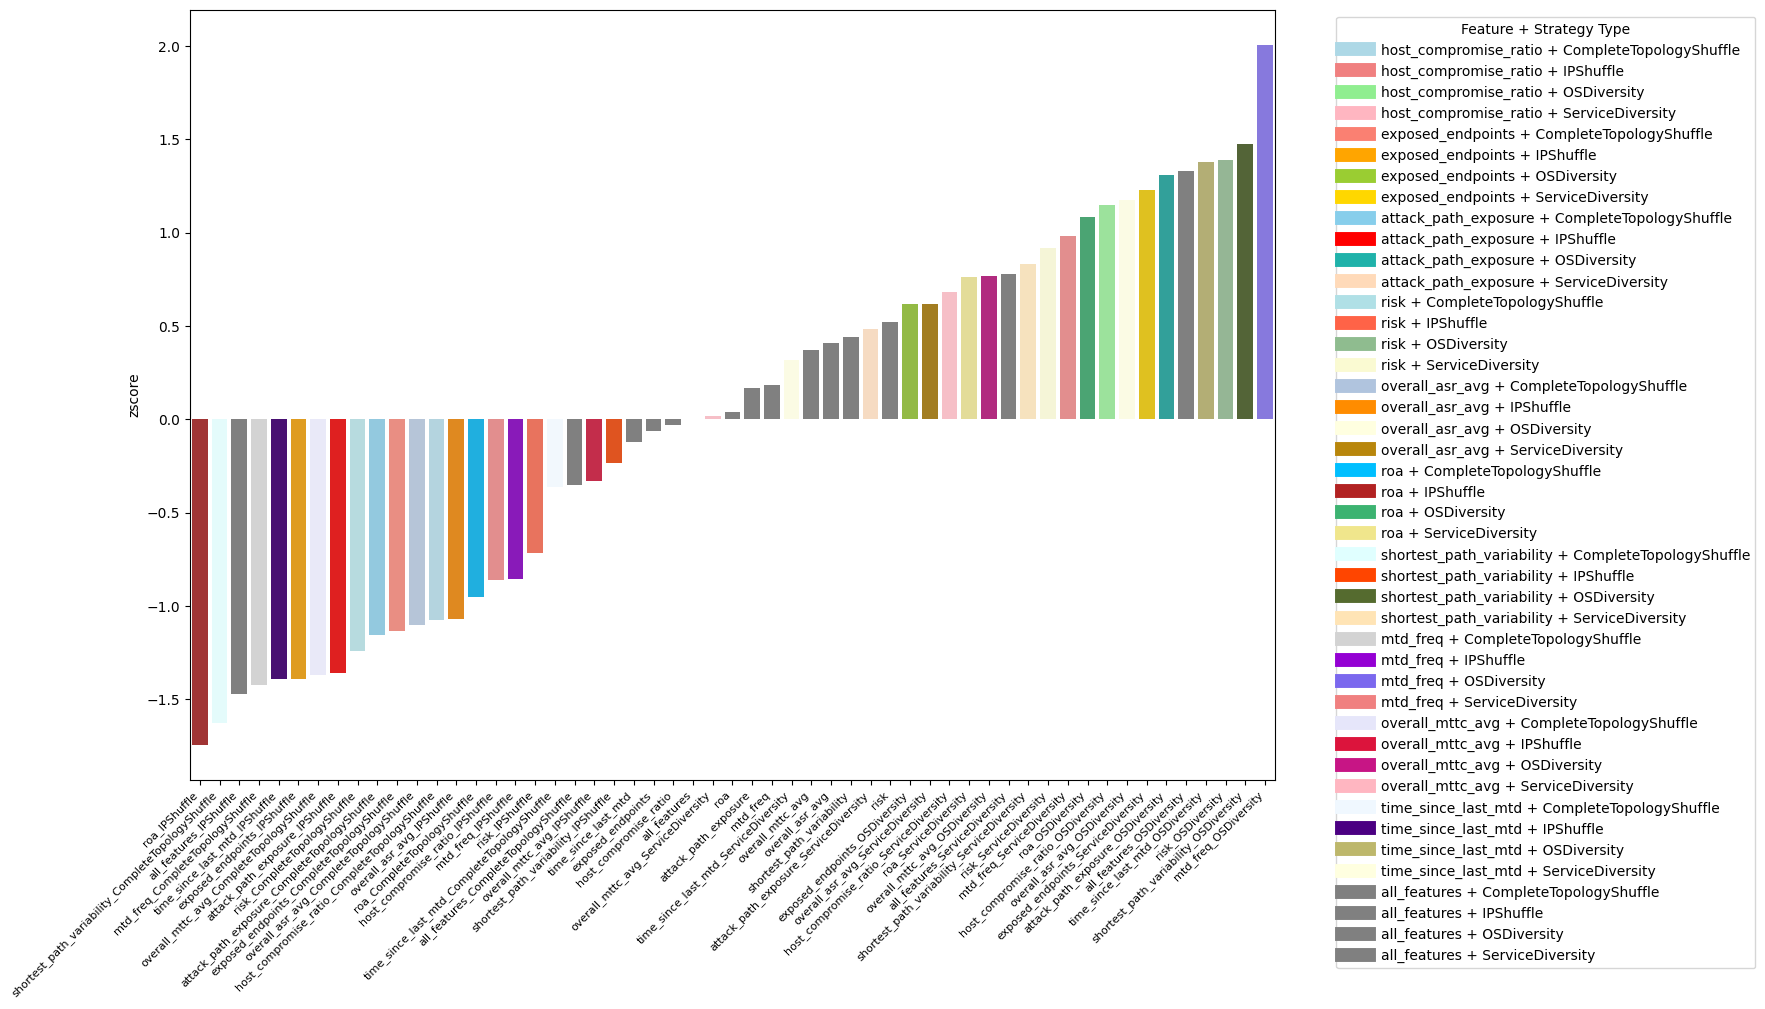

In [67]:
chart.all_combinations_chart('zscore')


In [68]:
data = pd.DataFrame(data)

In [69]:
data.loc['sum'] = data.sum(axis=0)

In [70]:
data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
ASR,1.541667,1.500000,1.666667,1.500000,1.500000,1.541667,1.500000,1.666667,1.500000,1.500000,...,1.527778,1.500000,1.666667,1.500000,1.500000,1.533333,1.500000,1.666667,1.500000,1.479167
time_to_compromise,1.539001,1.472921,1.490427,1.705920,1.636373,1.531516,1.463085,1.509948,1.681476,1.622091,...,1.536620,1.452389,1.536698,1.716701,1.594399,1.521410,1.460346,1.524587,1.695276,1.604064
attack_path_exposure,2.430100,2.259621,1.963146,2.659974,2.612895,2.460476,2.188711,1.946506,2.624508,2.583177,...,2.474469,2.211664,1.946506,2.659974,2.608279,2.454340,2.217121,1.917254,2.659974,2.579470
ROA,1.003314,1.103992,0.949342,1.048733,1.009120,1.023495,1.012679,1.046708,1.046538,1.034561,...,1.085373,0.976542,1.109508,0.925607,0.923494,0.965008,1.123553,1.002744,1.061525,0.998388
risk,1.035247,1.098857,1.001395,1.066848,1.043650,0.981797,1.034379,1.099603,1.070677,1.031752,...,1.046105,0.963792,1.182244,0.996320,0.928013,1.036367,1.131064,0.985090,1.081589,0.990844
sum,7.549328,7.435391,7.070978,7.981475,7.802039,7.538951,7.198854,7.269432,7.923198,7.771581,...,7.670345,7.104386,7.441622,7.798601,7.554184,7.510459,7.432084,7.096342,7.998365,7.651933


In [71]:
def group_columns_by_mtd(df):
    mtd_strategies = ['CompleteTopologyShuffle', 'IPShuffle', 'OSDiversity', 'ServiceDiversity']
    
    # Initialize empty groups
    groups = {
        'All MTD': [],
        'CompleteTopologyShuffle': [],
        'IPShuffle': [],
        'OSDiversity': [],
        'ServiceDiversity': []
    }

    # Iterate through each column name in the DataFrame
    for col in df.columns:
        # Check if the column contains any MTD strategy
        if any(mtd in col for mtd in mtd_strategies):
            # Group by the specific MTD strategy found in the column
            for mtd in mtd_strategies:
                if mtd in col:
                    groups[mtd].append(col)
                    break
        else:
            # If no MTD strategy is found in the column, it belongs to 'All MTD'
            groups['All MTD'].append(col)

    return groups


In [74]:
groups = group_columns_by_mtd(data)
import seaborn as sns

In [82]:
for mtd in groups:
    df = data[groups[mtd]]
    print(df)

                      all_features  host_compromise_ratio  exposed_endpoints  \
ASR                       1.541667               1.541667           1.527778   
time_to_compromise        1.539001               1.531516           1.521255   
attack_path_exposure      2.430100               2.460476           2.479664   
ROA                       1.003314               1.023495           1.022516   
risk                      1.035247               0.981797           0.977183   
sum                       7.549328               7.538951           7.528396   

                      attack_path_exposure  overall_asr_avg       roa  \
ASR                               1.520833         1.527778  1.541667   
time_to_compromise                1.512295         1.530923  1.535331   
attack_path_exposure              2.460476         2.476470  2.483239   
ROA                               1.014932         1.073314  1.007002   
risk                              1.095180         1.073756  0.994641   
s

Normalized Weighted Metrics for Each Scheme:
time_since_last_mtd          7.510459
exposed_endpoints            7.528396
host_compromise_ratio        7.538951
all_features                 7.549328
roa                          7.561879
attack_path_exposure         7.603717
mtd_freq                     7.609099
overall_mttc_avg             7.670345
overall_asr_avg              7.682240
shortest_path_variability    7.693347
risk                         7.718341
Name: sum, dtype: float64


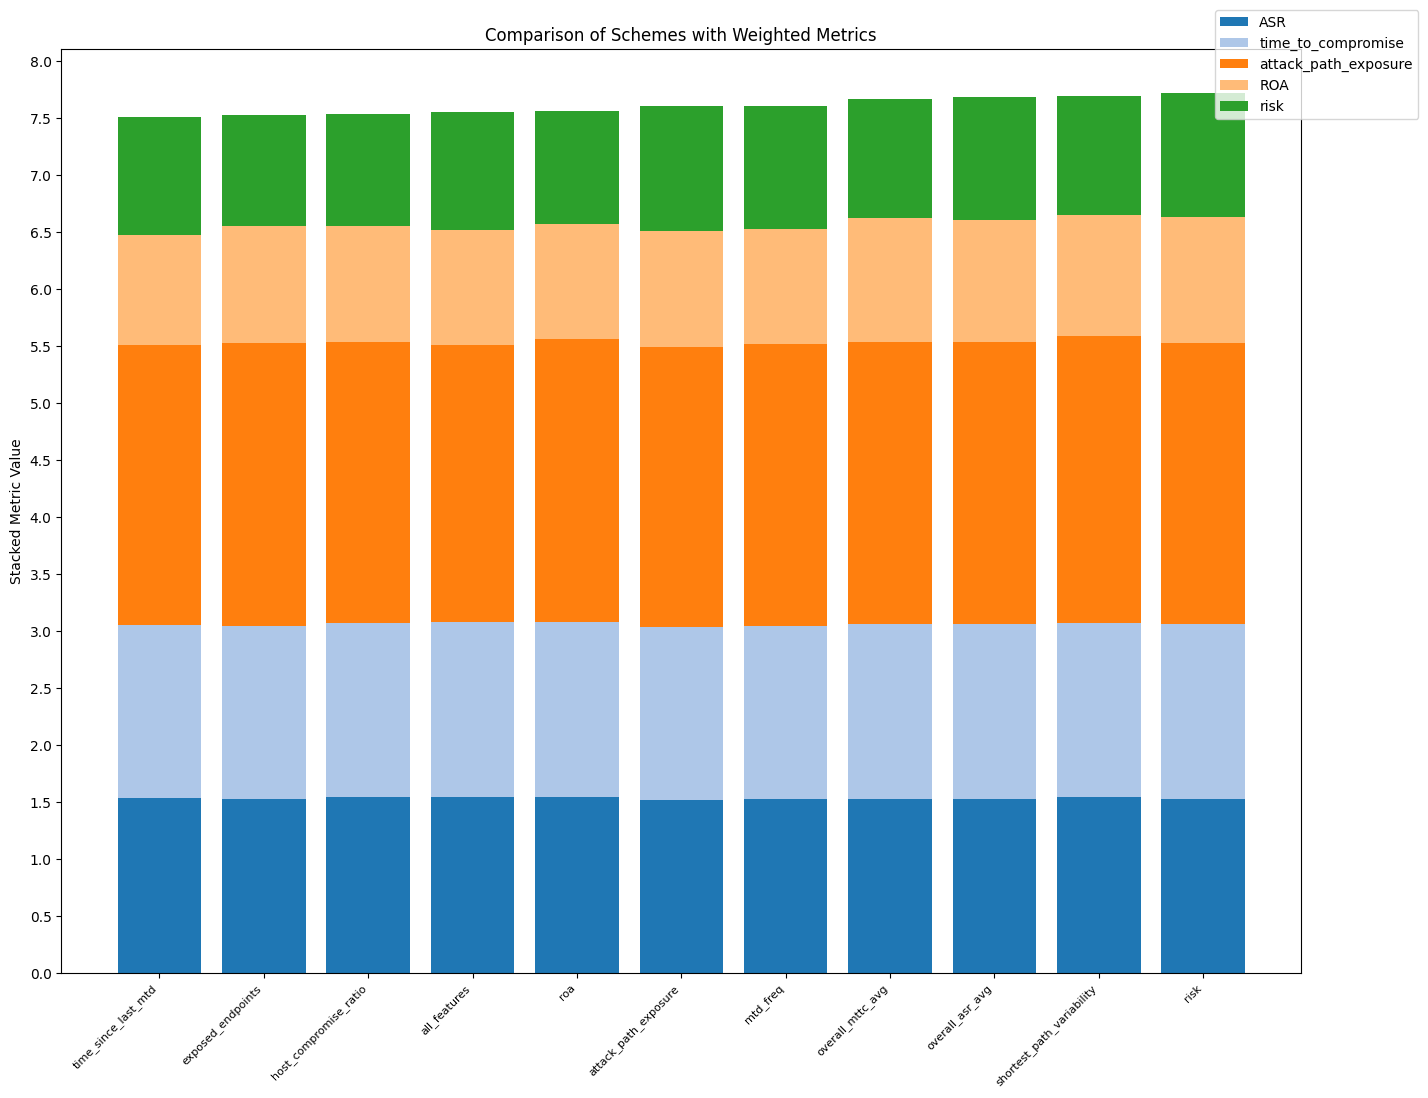

Normalized Weighted Metrics for Each Scheme:
shortest_path_variability_CompleteTopologyShuffle    7.020132
mtd_freq_CompleteTopologyShuffle                     7.085482
overall_mttc_avg_CompleteTopologyShuffle             7.104386
risk_CompleteTopologyShuffle                         7.144899
attack_path_exposure_CompleteTopologyShuffle         7.173897
exposed_endpoints_CompleteTopologyShuffle            7.180073
overall_asr_avg_CompleteTopologyShuffle              7.191383
host_compromise_ratio_CompleteTopologyShuffle        7.198854
roa_CompleteTopologyShuffle                          7.239905
time_since_last_mtd_CompleteTopologyShuffle          7.432084
all_features_CompleteTopologyShuffle                 7.435391
Name: sum, dtype: float64


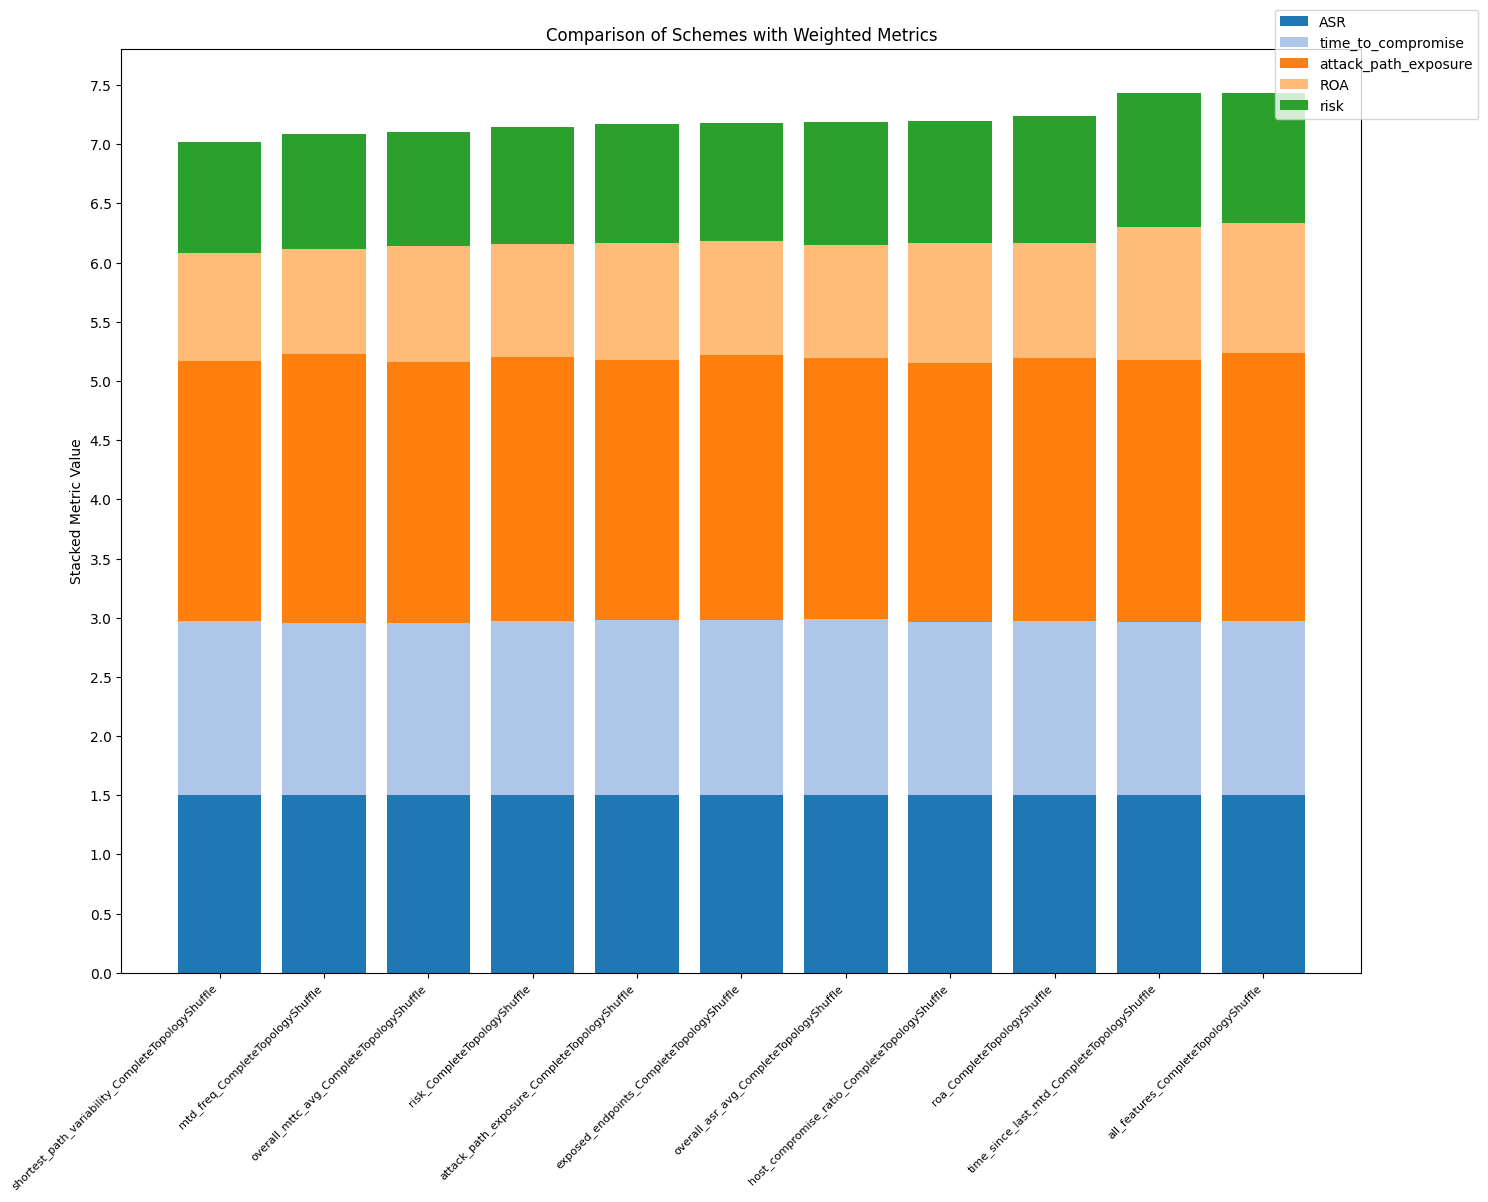

Normalized Weighted Metrics for Each Scheme:
roa_IPShuffle                          6.982086
all_features_IPShuffle                 7.070978
time_since_last_mtd_IPShuffle          7.096342
exposed_endpoints_IPShuffle            7.096564
attack_path_exposure_IPShuffle         7.106366
overall_asr_avg_IPShuffle              7.201965
host_compromise_ratio_IPShuffle        7.269432
mtd_freq_IPShuffle                     7.270861
risk_IPShuffle                         7.316086
overall_mttc_avg_IPShuffle             7.441622
shortest_path_variability_IPShuffle    7.473800
Name: sum, dtype: float64


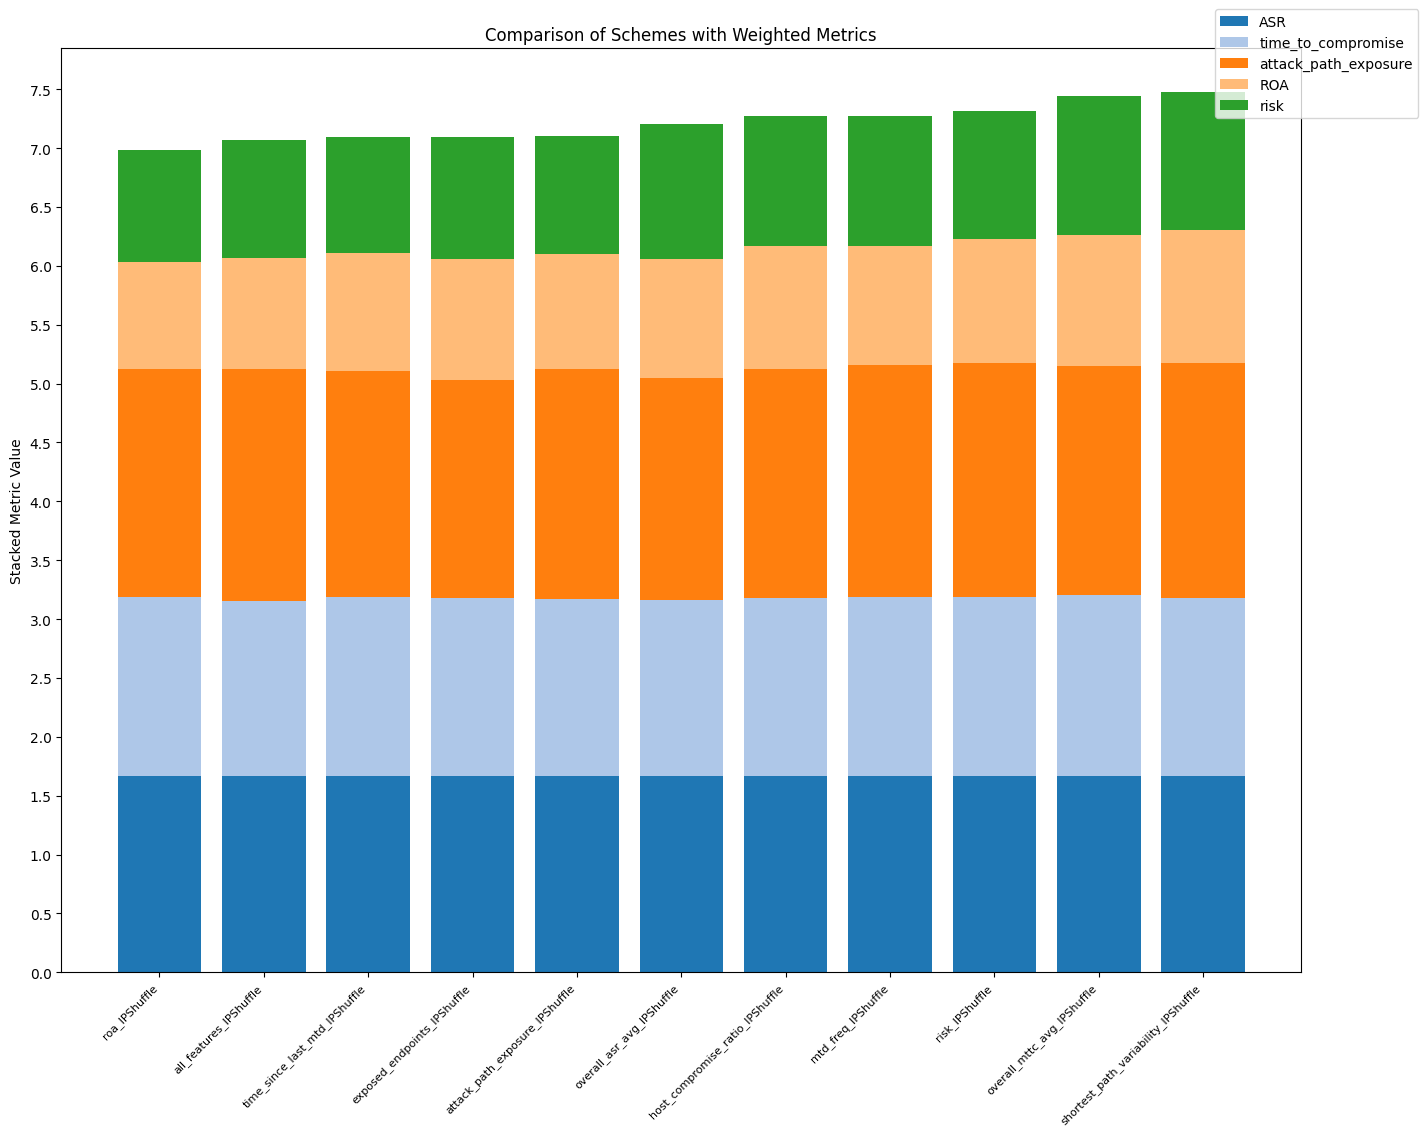

Normalized Weighted Metrics for Each Scheme:
exposed_endpoints_OSDiversity            7.749800
overall_mttc_avg_OSDiversity             7.798601
roa_OSDiversity                          7.901703
host_compromise_ratio_OSDiversity        7.923198
overall_asr_avg_OSDiversity              7.930547
attack_path_exposure_OSDiversity         7.974583
all_features_OSDiversity                 7.981475
time_since_last_mtd_OSDiversity          7.998365
risk_OSDiversity                         8.001215
shortest_path_variability_OSDiversity    8.028092
mtd_freq_OSDiversity                     8.201827
Name: sum, dtype: float64


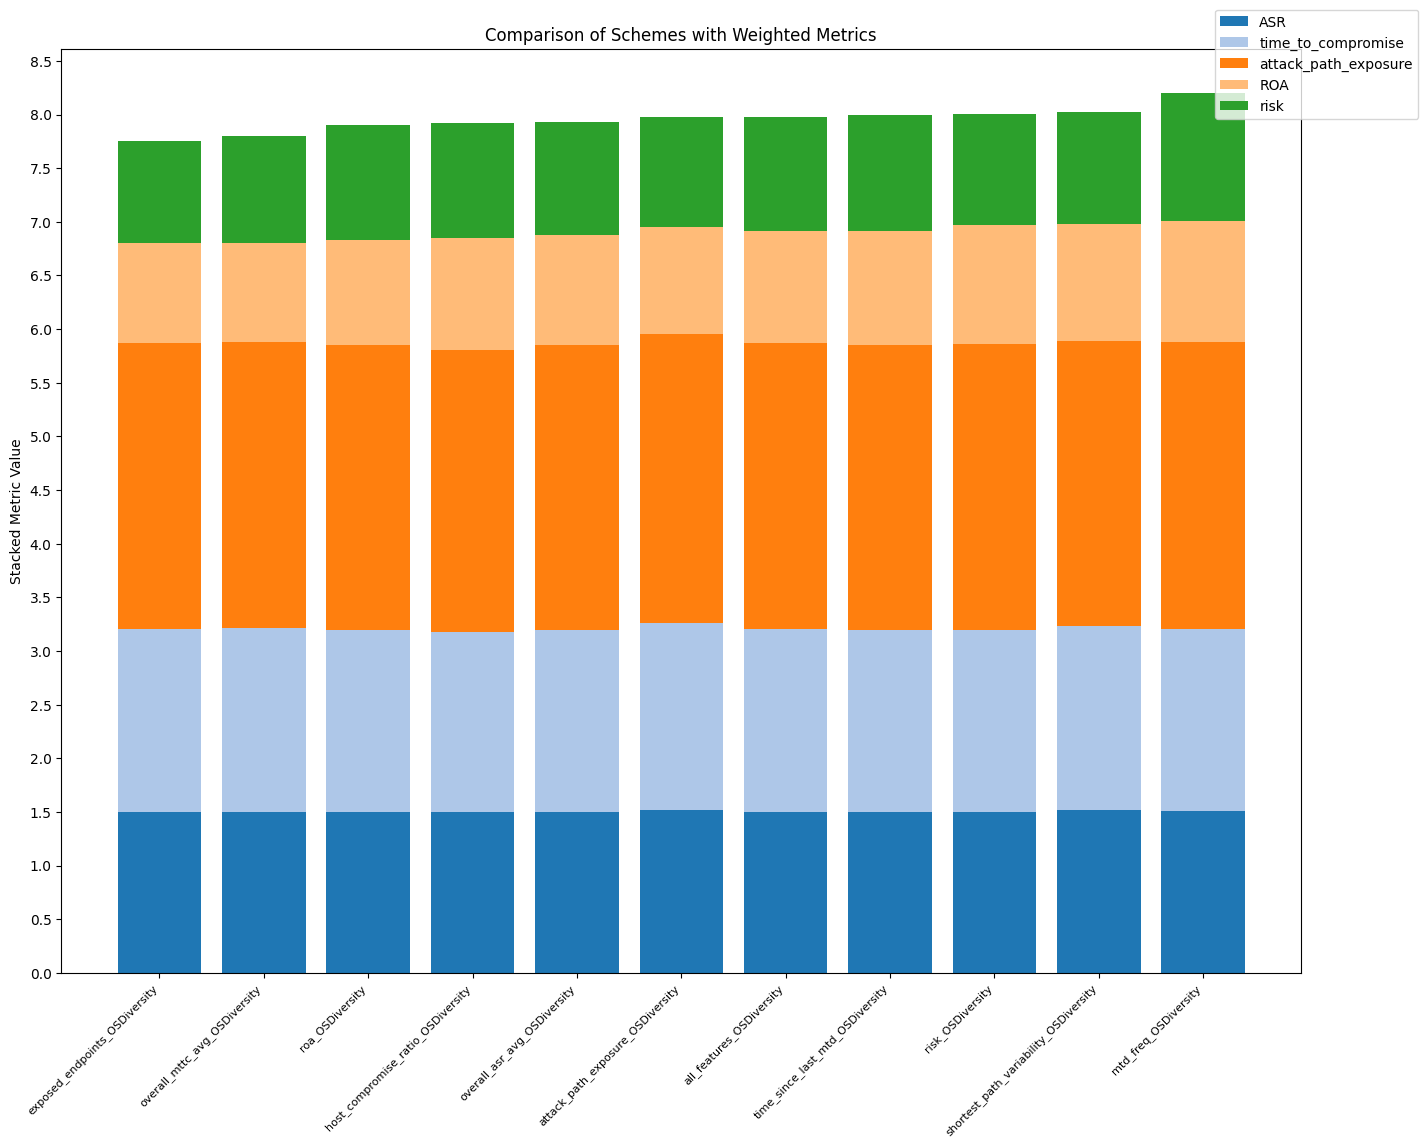

Normalized Weighted Metrics for Each Scheme:
overall_mttc_avg_ServiceDiversity             7.554184
time_since_last_mtd_ServiceDiversity          7.651933
attack_path_exposure_ServiceDiversity         7.707005
overall_asr_avg_ServiceDiversity              7.749846
host_compromise_ratio_ServiceDiversity        7.771581
roa_ServiceDiversity                          7.797441
all_features_ServiceDiversity                 7.802039
shortest_path_variability_ServiceDiversity    7.820663
risk_ServiceDiversity                         7.847409
mtd_freq_ServiceDiversity                     7.868575
exposed_endpoints_ServiceDiversity            7.949072
Name: sum, dtype: float64


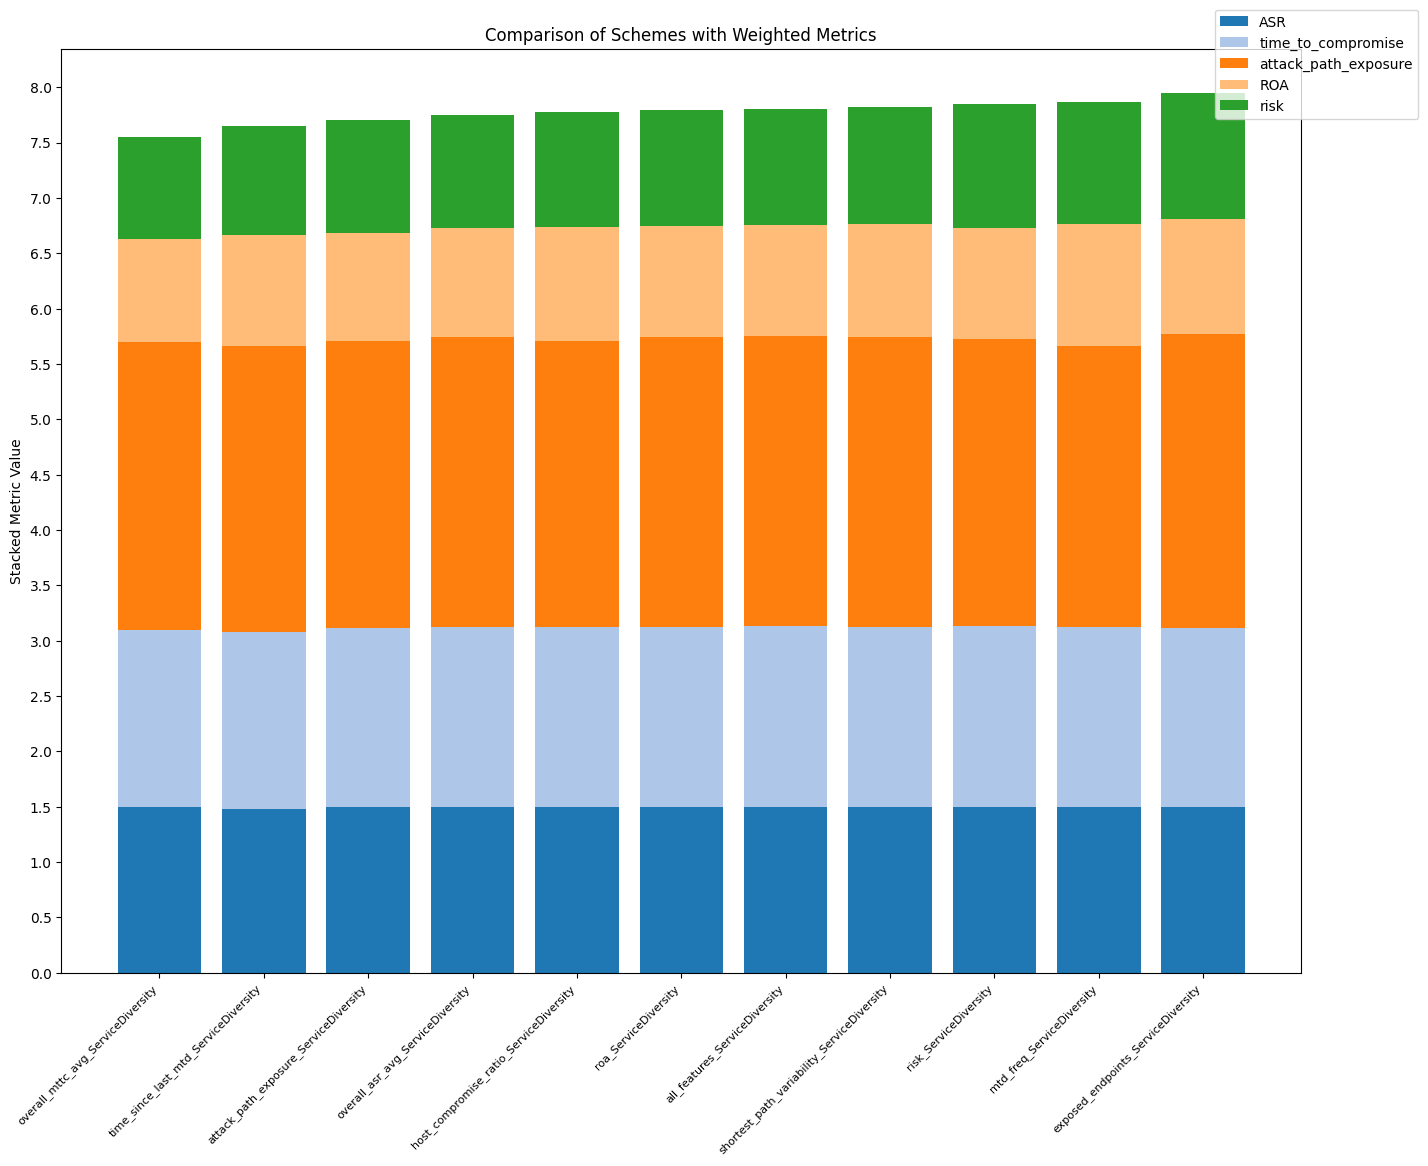

In [84]:
for mtd in groups:
    df = data[groups[mtd]].T
    # Sort the columns based on the sum row, from smallest to largest
    sorted_columns = df.sort_values(by='sum', axis = 0).index

    # Reorder the DataFrame columns
    sorted_data = data[sorted_columns].drop('sum')
    chart.plot_n_schemes(sorted_data)


